In [102]:
import time
from datetime import datetime, timedelta, date
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD

In [103]:
base_url = "https://api.alpaca.markets"
api_key_id = "AKVKN4TLUUS5MZO5KYLM"
api_secret = "nkK2UmvE1kTFFw1ZlaqDmwCyiuCu7OOeB5y2La/X"

In [104]:
api = tradeapi.REST(
    base_url=base_url, key_id=api_key_id, secret_key=api_secret
)

In [105]:
session = requests.session()

In [106]:
minute_history = api.polygon.historic_agg_v2(
    'RAD', 1, 'minute', _from = date.today() - timedelta(days=10), to=date.today() + timedelta(days=1), limit=1000).df

In [109]:
minute_history[:1000]

,open,high,low,close,volume
timestamp,,,,,
2019-12-17 10:18:00-05:00,7.7000,7.7024,7.6900,7.6933,4054.0
2019-12-17 10:19:00-05:00,7.6950,7.6950,7.6850,7.6850,1713.0
2019-12-17 10:20:00-05:00,7.6900,7.6900,7.6700,7.6700,4103.0
2019-12-17 10:21:00-05:00,7.6800,7.6800,7.6690,7.6694,1017.0
2019-12-17 10:22:00-05:00,7.6700,7.6700,7.6500,7.6700,10666.0
...,...,...,...,...,...
2019-12-19 11:00:00-05:00,12.2365,12.3000,12.2310,12.2900,52772.0
2019-12-19 11:01:00-05:00,12.2801,12.3300,12.2801,12.3279,51498.0
2019-12-19 11:02:00-05:00,12.3299,12.3299,12.2803,12.3286,26987.0


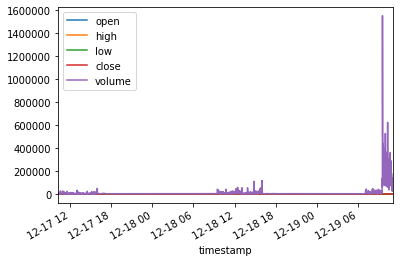

In [110]:
minute_history[:1000].plot.line()

In [111]:
m = MACD(minute_history[:1000]["close"].dropna())

In [112]:
m[0]

timestamp
2019-12-17 10:18:00-05:00         NaN
2019-12-17 10:19:00-05:00         NaN
2019-12-17 10:20:00-05:00         NaN
2019-12-17 10:21:00-05:00         NaN
2019-12-17 10:22:00-05:00         NaN
                               ...   
2019-12-19 11:00:00-05:00    0.065632
2019-12-19 11:01:00-05:00    0.067926
2019-12-19 11:02:00-05:00    0.069006
2019-12-19 11:03:00-05:00    0.072272
2019-12-19 11:04:00-05:00    0.080485
Length: 1000, dtype: float64

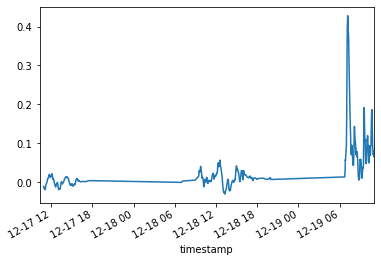

In [113]:
m[0].plot.line()

In [117]:
hist = MACD(minute_history["close"].dropna(), 40, 60)[0]

In [118]:
hist

timestamp
2019-12-17 10:18:00-05:00         NaN
2019-12-17 10:19:00-05:00         NaN
2019-12-17 10:20:00-05:00         NaN
2019-12-17 10:21:00-05:00         NaN
2019-12-17 10:22:00-05:00         NaN
                               ...   
2019-12-19 11:00:00-05:00    0.131857
2019-12-19 11:01:00-05:00    0.131439
2019-12-19 11:02:00-05:00    0.130856
2019-12-19 11:03:00-05:00    0.130753
2019-12-19 11:04:00-05:00    0.131748
Length: 1000, dtype: float64

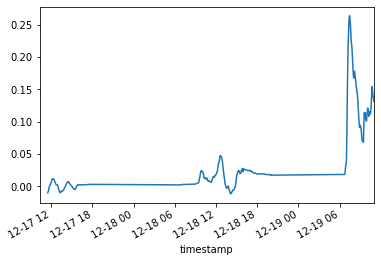

In [119]:
hist.plot.line()

In [120]:
if hist[-1] < 0 or np.diff(hist)[-1] < 0:
    print("no")

In [121]:
np.diff(hist)[-10:]

array([-0.00034768, -0.00085921, -0.00068872, -0.00133043, -0.00159884,
       -0.0008836 , -0.00041767, -0.00058329, -0.00010299,  0.0009948 ])